In [39]:
import pandas as pd
import ast
from statsmodels.stats.weightstats import ztest
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler
import numpy as np

### Data loading and pre-processing

In [34]:
tracks_df = pd.read_csv("archive/tracks.csv")
artists_df = pd.read_csv("archive/artists.csv")

In [35]:
features = ['danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'explicit']

In [36]:
scaler = MinMaxScaler()
tracks_df["popularity_scaled"] = scaler.fit_transform(tracks_df["popularity"].values.reshape(-1,1))

In [37]:
tracks_df[features] = scaler.fit_transform(tracks_df[features].values)

### Clustering

In [8]:
scores = []
sample_size = int(len(tracks_df)*0.1)
for n_clusters in range(2, 10):
    print(n_clusters)
    kmeans = KMeans(n_clusters=n_clusters)
    tracks_df["cluster"] = kmeans.fit_predict(tracks_df[features])
    score = silhouette_score(tracks_df[features], tracks_df["cluster"], sample_size=sample_size)
    scores.append(score)

2


/Users/omkar/miniconda3/envs/cs107/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


3


/Users/omkar/miniconda3/envs/cs107/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


4


/Users/omkar/miniconda3/envs/cs107/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


5


/Users/omkar/miniconda3/envs/cs107/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


6


/Users/omkar/miniconda3/envs/cs107/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


7


/Users/omkar/miniconda3/envs/cs107/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


8


/Users/omkar/miniconda3/envs/cs107/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


9


/Users/omkar/miniconda3/envs/cs107/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


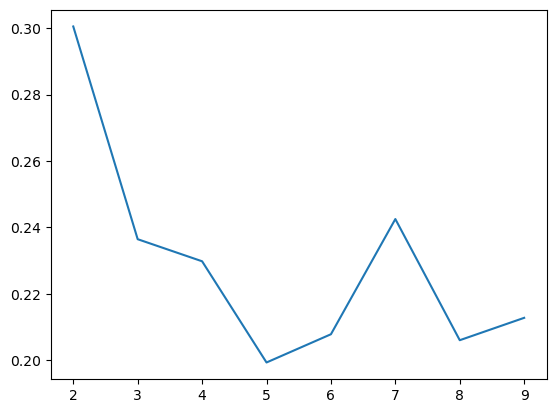

In [38]:
import matplotlib.pyplot as plt
plt.plot(range(2, 10), scores)
# plt.savefig("elbow_plot.png", bbox_inches="tight")

#### Set the number of clusters using Elbow-method

In [10]:
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters)
tracks_df["cluster"] = kmeans.fit_predict(tracks_df[features])

/Users/omkar/miniconda3/envs/cs107/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [11]:
kmeans.cluster_centers_, kmeans.feature_names_in_

(array([[ 5.10936679e-01,  3.47340325e-01,  4.89590301e-01,
          7.14940122e-01, -7.47180096e-14,  1.31300259e-01,
          7.84032047e-01,  1.81155491e-01,  2.14057804e-01,
          4.58563813e-01,  4.53312174e-01,  9.08362606e-03],
        [ 6.04853656e-01,  6.77479606e-01,  7.17361815e-01,
          7.93787212e-01,  1.00000000e+00,  9.18389207e-02,
          2.38802152e-01,  5.82218894e-02,  2.15868087e-01,
          6.29291166e-01,  5.00178539e-01,  5.46005748e-02],
        [ 4.98327086e-01,  2.99225709e-01,  4.49390335e-01,
          7.06393170e-01,  1.00000000e+00,  1.20379778e-01,
          8.33571960e-01,  1.95549830e-01,  2.08612851e-01,
          4.43625688e-01,  4.51885441e-01,  3.78266850e-03],
        [ 6.02563180e-01,  6.70082468e-01,  1.27647989e-01,
          7.90782502e-01,  1.00000000e+00,  1.01591556e-01,
          2.37033192e-01,  6.03453065e-02,  2.22057734e-01,
          6.16684252e-01,  4.99680383e-01,  5.92562615e-02],
        [ 6.25605024e-01,  7.1314420

### Plot Cluster Centres

['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'explicit', 'danceability']
13 13
13 13
13 13
13 13
13 13


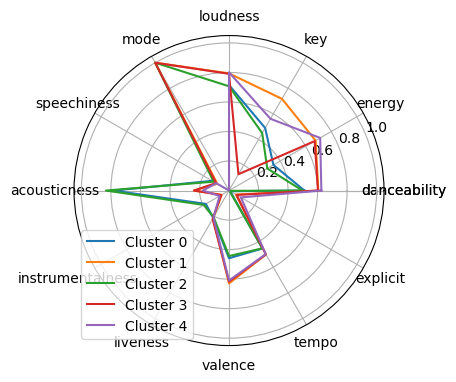

In [25]:
categories = ['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
        'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
        'explicit']
categories = [*categories, categories[0]]

label_loc = np.linspace(start=0, stop=2 * np.pi, num=len(categories))
print(categories)
plt.figure(figsize=(4, 4.5))
plt.subplot(polar=True)
for cluster in range(n_clusters):
    x = list(kmeans.cluster_centers_[cluster][0:len(categories)-1])
    x = x + [x[0]]
    print(len(x),len(label_loc))
    plt.plot(label_loc, x, label=f'Cluster {cluster}')
# plt.title('Cluster comparison', size=10, y=1.05)
lines, labels = plt.thetagrids(np.degrees(label_loc), labels=categories)
plt.legend()
plt.savefig("Kmeans_centres.png", bbox_inches="tight")
plt.show()

### Compare songs from top-artists with the rest

In [14]:
tracks_df["id_artists"] = tracks_df["id_artists"].apply(ast.literal_eval)

In [29]:
def popularity_comparison(tracks_df, artists_df, top_n_p):
    print(f"Running analysis for top {top_n_p*100}% of artists")
    top_n = int(top_n_p*len(artists_df))
    top_n_artists = set(artists_df.sort_values(by="popularity", ascending=False).head(top_n)['id'])
    tracks_df["is_top_artist"] = tracks_df["id_artists"].apply(lambda x: bool(len(set(x).intersection(top_n_artists))))
    for cluster, cluster_data in tracks_df.groupby("cluster"):
        top_artist_pop = cluster_data[cluster_data["is_top_artist"]]["popularity"]
        non_top_artist_pop = cluster_data[~cluster_data["is_top_artist"]]["popularity"]
        song_dist = cluster_data["is_top_artist"].value_counts(normalize=True).to_dict()
        print(f"Songs Distribution(True refers to song by top artist): {song_dist}")
        print(f"Cluster {cluster}")
        mean_top = top_artist_pop.mean()
        mean_other = non_top_artist_pop.mean()
        print(f"Mean popularity-  Top artist songs: {mean_top}, Others: {mean_other}, Percent Diff: {(mean_top-mean_other)/mean_other}")
        ztest_res = ztest(top_artist_pop, non_top_artist_pop, alternative="larger")
        print(f"p-val: {ztest_res}")

In [30]:
popularity_comparison(tracks_df, artists_df, 0.01)

Running analysis for top 1.0% of artists
Songs Distribution(True refers to song by top artist): {False: 0.6332153908744591, True: 0.3667846091255409}
Cluster 0
Mean popularity-  Top artist songs: 27.657019932103122, Others: 16.28982516257155, Percent Diff: 0.6978095010896435
p-val: (98.4360785876801, 0.0)
Songs Distribution(True refers to song by top artist): {False: 0.5365232943846076, True: 0.4634767056153925}
Cluster 1
Mean popularity-  Top artist songs: 40.592615259077924, Others: 25.070930317938174, Percent Diff: 0.6191108484727442
p-val: (178.95425088349808, 0.0)
Songs Distribution(True refers to song by top artist): {False: 0.6129447699703993, True: 0.38705523002960074}
Cluster 2
Mean popularity-  Top artist songs: 25.987474522237513, Others: 14.946404998679926, Percent Diff: 0.7387107150202835
p-val: (127.28142587849831, 0.0)
Songs Distribution(True refers to song by top artist): {False: 0.5363883097275146, True: 0.46361169027248544}
Cluster 3
Mean popularity-  Top artist songs